In [1]:
run_dir="/opt/sfb_ocean/suntans/runs/merge_005-20170610/"

In [4]:
import os
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

In [5]:
met_ds=xr.open_dataset(os.path.join(run_dir,"Estuary_MetForcing.nc"))

<IPython.core.display.Javascript object>


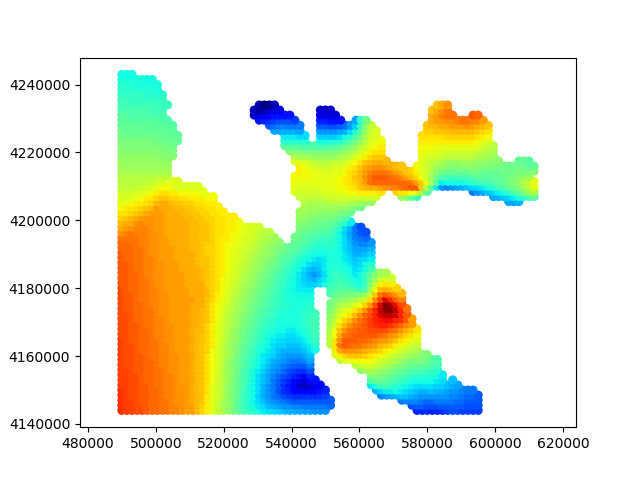

(483924.99392646353, 617575.0060735365, 4139049.991849366, 4247950.008150633)

In [19]:
plt.figure()
ax=plt.gca()

slc=slice(0,3050)

scat=ax.scatter( met_ds.x_Uwind.values[slc], 
                met_ds.y_Uwind.values[slc], 30, 
                met_ds.Uwind.isel(nt=10).values[slc],
                 cmap='jet')
ax.axis('equal')

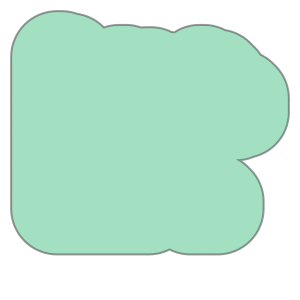

In [22]:
all_xy=np.c_[met_ds.x_Uwind.values,
             met_ds.y_Uwind.values]
from shapely import geometry
from shapely.ops import cascaded_union

pnts=[geometry.Point(xy[0],xy[1])
      for xy in all_xy[slc]]
                     
poly=cascaded_union( [p.buffer(30e3) for p in pnts] )
poly